In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import signal
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
#from loess.loess_1d import loess_1d
from statsmodels.nonparametric.smoothers_lowess import lowess
#from tvregdiff import TVRegDiff
import pandas as pd

In [3]:
def create_exp(N, A, B):
    expo = A*np.exp(-B*np.arange(0,N))
    return expo
def create_lin(N, a, b):
    lin = a*np.arange(0,N) + b
    return lin
def concat_noise(C, m = 0, s = 1):
    # import numpy as np
    concat = []
    for c in C:
        concat.extend(c)
    X = np.arange(0,len(concat))
    Y = concat +  np.random.normal(loc=m, scale=s, size=len(concat))
    return X, Y

def RMSE(Ypred, Yreal):
    rmse = np.sqrt(np.sum(np.square(Ypred-Yreal))/np.shape(Ypred)[0])
    return rmse
def fit_and_pred(X, y):
    Xarr = np.array(X).reshape(-1,1)
    yarr = np.array(y).reshape(-1,1)
    reg = LinearRegression().fit(Xarr, yarr)
    pred = reg.predict(Xarr)
    rmse = RMSE(pred, yarr)
    return rmse
def sliding_window_pred(X, y, window, lag):
    Xmax = np.shape(X)[0]-window+1
    start = np.arange(0, Xmax, lag)
    mean_start = X[[int(s + window/2) for s in start]]
    score = [fit_and_pred(X[s:s+window], y[s:s+window]) 
            for s in start]    
    return score, mean_start

In [4]:
from tvregdiff import TVRegDiff

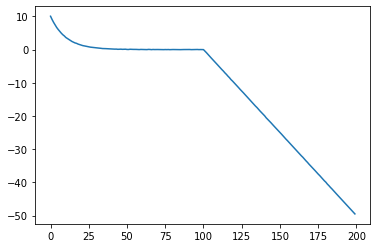

In [10]:
# expo = create_exp(N = 100, A = 10 , B = 0.001)
# lin = create_lin(N = 100, a = -0.0005 , b = expo[-1]-0.01*expo[-1])
expo = create_exp(N = 100, A = 10 , B = 0.1)
lin = create_lin(N = 100, a = -0.5 , b = expo[-1]-0.01*expo[-1])
X, Y = concat_noise(C = [expo,lin], m = 0, s = 0.02)
plt.plot(X, Y )
plt.show()

In [12]:
print('\n-------------------  without smoother')
Ysm = lowess(exog = X, endog = Y, frac = 0.01, delta = 0.001 * X.shape[0], return_sorted = False)
dX = X[1] - X[0]

dYdX = TVRegDiff(data=Y ,itern=4000, 
                 alph=10, dx=dX, 
                 ep=1e-8,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 u0=np.append([0],np.diff(Y)),
                 cgtol = 1e-4)


-------------------  without smoother


In [13]:
d_dYdX = TVRegDiff(data=dYdX ,itern=50, 
                 alph=0.0001, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 cgtol = 1e-4)

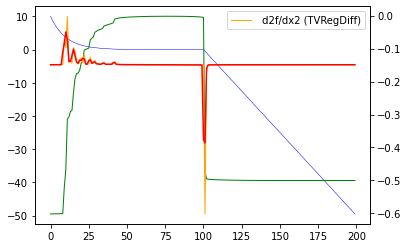

In [14]:
fig, ax1 = plt.subplots()

ax1.plot(X, Y, label='f(x)', c='blue', lw=0.5)
# plt.plot(X, np.gradient(Y, dX)*10,
#          label='df/dx (numpy)', c=(0, 0.3, 0.8), lw=1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax2.plot(X, dYdX, label='df/dx (TVRegDiff)',
         c='green', lw=1)
ax3.plot(X, d_dYdX, label=' d2f/dx2 (TVRegDiff)',
         c='orange', lw=1)
ax3.plot(np.gradient(dYdX), c='red')
ax3.axis('off')
plt.legend()
plt.show()

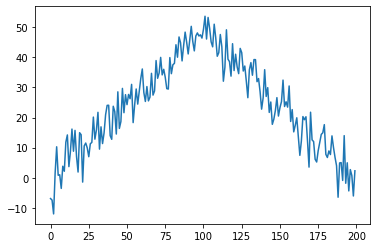

In [45]:
# expo = create_exp(N = 100, A = 10 , B = 0.001)
# lin = create_lin(N = 100, a = -0.0005 , b = expo[-1]-0.01*expo[-1])
expo = create_lin(N = 100, a = 0.5 , b = 0)
lin = create_lin(N = 100, a = -0.5 , b = expo[-1]-0.01*expo[-1])
X, Y = concat_noise(C = [expo,lin], m = 0, s = 5)
plt.plot(X, Y )
plt.show()

In [50]:
print('\n-------------------  without smoother')
Ysm = lowess(exog = X, endog = Y, frac = 0.01, delta = 0.001 * X.shape[0], return_sorted = False)
dX = X[1] - X[0]

dYdX = TVRegDiff(data=Y ,itern=4000, 
                 alph=500, dx=dX, 
                 ep=1e-8,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 u0=np.append([0],np.diff(Y)),
                 cgtol = 1e-4)
d_dYdX = TVRegDiff(data=dYdX ,itern=50, 
                 alph=0.0001, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 cgtol = 1e-4)


-------------------  without smoother


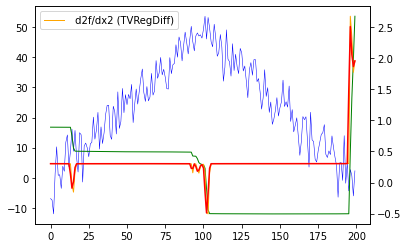

In [51]:
fig, ax1 = plt.subplots()

ax1.plot(X, Y, label='f(x)', c='blue', lw=0.5)
# plt.plot(X, np.gradient(Y, dX)*10,
#          label='df/dx (numpy)', c=(0, 0.3, 0.8), lw=1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax2.plot(X, dYdX, label='df/dx (TVRegDiff)',
         c='green', lw=1)
ax3.plot(X, d_dYdX, label=' d2f/dx2 (TVRegDiff)',
         c='orange', lw=1)
ax3.plot(np.gradient(dYdX), c='red')
ax3.axis('off')
plt.legend()
plt.show()

In [52]:
X = np.linspace(0,1,100)
y = np.abs(X-1/2)

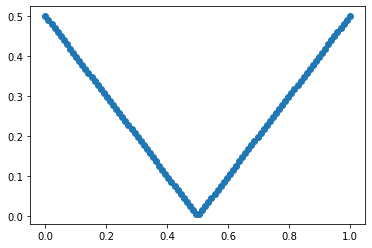

In [53]:
plt.scatter(X,y)
plt.show()

In [54]:
Y = y + np.random.normal(loc=0, scale=0.05, size=len(y))

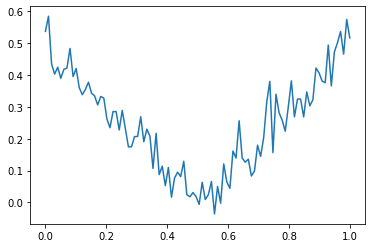

In [55]:
plt.plot(X,Y)
plt.show()

In [56]:
print('\n-------------------  without smoother')
dX = X[1] - X[0]

dYdX = TVRegDiff(data=Y ,itern=4000, 
                 alph=0.2, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 u0=np.append([0],np.diff(Y)),
                 cgtol = 1e-4)
d_dYdX = TVRegDiff(data=dYdX ,itern=50, 
                 alph=0.0001, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 cgtol = 1e-4)


-------------------  without smoother


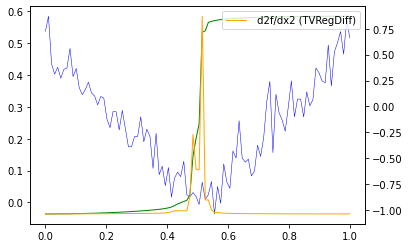

In [57]:
fig, ax1 = plt.subplots()

ax1.plot(X, Y, label='f(x)', c='blue', lw=0.5)
# plt.plot(X, np.gradient(Y, dX)*10,
#          label='df/dx (numpy)', c=(0, 0.3, 0.8), lw=1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax2.plot(X, dYdX, label='df/dx (TVRegDiff)',
         c='green', lw=1)
ax3.plot(X, d_dYdX, label=' d2f/dx2 (TVRegDiff)',
         c='orange', lw=1)
#ax3.plot(X, np.gradient(dYdX), c='red')
ax3.axis('off')
plt.legend()
plt.show()

In [5]:
df = pd.read_csv('C:\\Users\\xavier\\Documents\\DetectEvent\\DetectEvent\\data\\auto_gmin_testdataset (another copy).csv', skiprows=1)

In [5]:
df.head()

,campaign,sample_ID,date_time,weight_g,T_C,RH,Area_m2,Patm
0,branch_vs_leaf_4,B22_LITU_BL_09,20/10/2020 11:32,8.355865,26.0050,62.6275,0.057142,101.325
1,branch_vs_leaf_4,B22_LITU_BL_09,20/10/2020 11:36,8.391122,26.0325,62.8575,0.057142,101.325
2,branch_vs_leaf_4,B22_LITU_BL_09,20/10/2020 11:40,8.373493,26.0025,62.7650,0.057142,101.325
3,branch_vs_leaf_4,B22_LITU_BL_09,20/10/2020 11:44,8.302980,25.9375,62.9200,0.057142,101.325
4,branch_vs_leaf_4,B22_LITU_BL_09,20/10/2020 11:48,8.355865,25.9425,62.6150,0.057142,101.325


In [7]:
df['TIME_COL2'] =  pd.to_datetime( df['date_time'] , infer_datetime_format=True).values
df['delta_time']= (df['TIME_COL2']-df['TIME_COL2'][0])
X=df['delta_time'].dt.total_seconds() / 60
Y = df['weight_g'].values

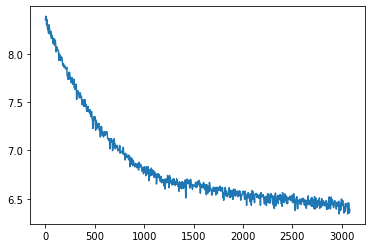

In [9]:
plt.plot(X,Y)
plt.show()

In [12]:
print('\n-------------------  without smoother')
dX = X[1] - X[0]

dYdX = TVRegDiff(data=Y ,itern=4000, 
                 alph=1000, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 u0=np.append([0],np.diff(Y)),
                 cgtol = 1e-4)
d_dYdX = TVRegDiff(data=dYdX ,itern=50, 
                 alph=10, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 cgtol = 1e-4)


-------------------  without smoother


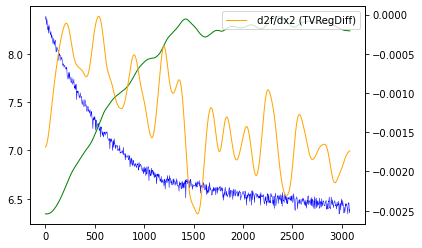

In [13]:
fig, ax1 = plt.subplots()

ax1.plot(X, Y, label='f(x)', c='blue', lw=0.5)
# plt.plot(X, np.gradient(Y, dX)*10,
#          label='df/dx (numpy)', c=(0, 0.3, 0.8), lw=1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax2.plot(X, dYdX, label='df/dx (TVRegDiff)',
         c='green', lw=1)
ax3.plot(X, d_dYdX, label=' d2f/dx2 (TVRegDiff)',
         c='orange', lw=1)
#ax3.plot(X, np.gradient(dYdX), c='red')
ax3.axis('off')
plt.legend()
plt.show()

In [ ]:
def _compute_gmin(df, slope):                
    SEP = ','
    TIME_COL = 'date_time'
    SAMPLE_ID = 'sample_ID'
    YVAR = 'weight_g'
    T = 'T_C'
    RH = 'RH'
    PATM = 'Patm'
    AREA = 'Area_m2'
    k= (slope/18.01528)*(1000/60) #ici c'est en minutes (60*60*24)

    #Calcul VPD en kpa (Patm = 101.325 kPa)
    VPD =0.1*((6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))) - ((df[RH].values)/100*(6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))))) 

    #calcul gmin mmol.s
    gmin_ = -k * (df[PATM].values)/VPD

    #calcul gmin en mmol.m-2.s-1
    gmin = gmin_ / (df[AREA].values)

    #print('gmin : ', gmin)
    try:
        print('gmin mean last 100 values: ', np.mean(gmin[-100:]))
    except:
        print('gmin mean last 10 values: ', np.mean(gmin[-10:]))
    try:
        print('slope mean last 100 values: ', np.mean(slope[-100:]))
    except:
        print('slope mean last 10 values: ', np.mean(slope[-10:]))
   # return gmin, k, VPD


value from RMSE method
- slope : -0.00014594488854
- gmin : 0.180976061526397


In [21]:
_compute_gmin(df = df, slope = dYdX)

gmin mean last 100 values:  0.16508448596408062
slope mean last 100 values:  -0.0001368172990376594


# With smoothing

In [17]:
df = pd.read_csv('C:\\Users\\xavier\\Documents\\DetectEvent\\DetectEvent\\data\\auto_gmin_testdataset (copy) - Copie.csv', skiprows=1, sep=";")

In [18]:
df.head()

,campaign,sample_ID,date_time,weight_g,T_C,RH,Area_m2,Patm
0,branch_vs_leaf_4,B17_LITU_BL_11,20/10/2020 11:28,3.309324,26.0050,62.6275,0.0351,101.325
1,branch_vs_leaf_4,B17_LITU_BL_11,20/10/2020 11:32,3.362415,26.0050,62.6275,0.0351,101.325
2,branch_vs_leaf_4,B17_LITU_BL_11,20/10/2020 11:36,3.256233,26.0325,62.8575,0.0351,101.325
3,branch_vs_leaf_4,B17_LITU_BL_11,20/10/2020 11:40,3.238536,26.0025,62.7650,0.0351,101.325
4,branch_vs_leaf_4,B17_LITU_BL_11,20/10/2020 11:44,3.256233,25.9375,62.9200,0.0351,101.325


In [19]:
df['TIME_COL2'] =  pd.to_datetime( df['date_time'] , infer_datetime_format=True).values
df['delta_time']= (df['TIME_COL2']-df['TIME_COL2'][0])
X=df['delta_time'].dt.total_seconds() / 60
Y = df['weight_g'].values

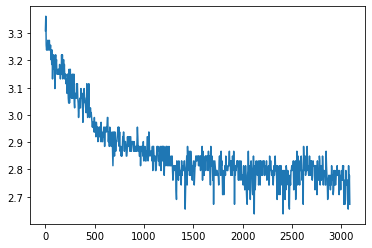

In [20]:
plt.plot(X,Y)
plt.show()

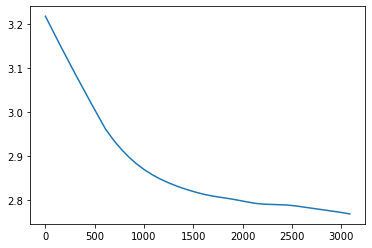

In [21]:
Ysm = lowess(exog = X, endog = Y, frac = 0.4, delta = 0.1 * X.shape[0], return_sorted = False)
plt.plot(X,Ysm)
plt.show()

In [22]:
Y = Ysm

In [23]:
print('\n-------------------  without smoother')
dX = X[1] - X[0]

dYdX = TVRegDiff(data=Y ,itern=7000, 
                 alph=1000, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 u0=np.append([0],np.diff(Y)),
                 cgtol = 1e-4)
d_dYdX = TVRegDiff(data=dYdX ,itern=50, 
                 alph=10, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 cgtol = 1e-4)


-------------------  without smoother


In [24]:
def _compute_gmin(df, slope):                
    SEP = ','
    TIME_COL = 'date_time'
    SAMPLE_ID = 'sample_ID'
    YVAR = 'weight_g'
    T = 'T_C'
    RH = 'RH'
    PATM = 'Patm'
    AREA = 'Area_m2'
    k= (slope/18.01528)*(1000/60) #ici c'est en minutes (60*60*24)

    #Calcul VPD en kpa (Patm = 101.325 kPa)
    VPD =0.1*((6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))) - ((df[RH].values)/100*(6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))))) 

    #calcul gmin mmol.s
    gmin_ = -k * (df[PATM].values)/VPD

    #calcul gmin en mmol.m-2.s-1
    gmin = gmin_ / (df[AREA].values)

    #print('gmin : ', gmin)
    try:
        print('gmin mean last 100 values: ', np.mean(gmin[-100:]))
    except:
        print('gmin mean last 10 values: ', np.mean(gmin[-10:]))
    try:
        print('slope mean last 100 values: ', np.mean(slope[-100:]))
    except:
        print('slope mean last 10 values: ', np.mean(slope[-10:]))
   # return gmin, k, VPD

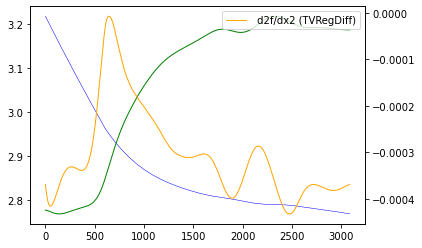

In [25]:
fig, ax1 = plt.subplots()

ax1.plot(X, Y, label='f(x)', c='blue', lw=0.5)
# plt.plot(X, np.gradient(Y, dX)*10,
#          label='df/dx (numpy)', c=(0, 0.3, 0.8), lw=1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax2.plot(X, dYdX, label='df/dx (TVRegDiff)',
         c='green', lw=1)
ax3.plot(X, d_dYdX, label=' d2f/dx2 (TVRegDiff)',
         c='orange', lw=1)
#ax3.plot(X, np.gradient(dYdX), c='red')
ax3.axis('off')
plt.legend()
plt.show()

In [26]:
def _compute_gmin(df, slope):                
    SEP = ','
    TIME_COL = 'date_time'
    SAMPLE_ID = 'sample_ID'
    YVAR = 'weight_g'
    T = 'T_C'
    RH = 'RH'
    PATM = 'Patm'
    AREA = 'Area_m2'
    k= (slope/18.01528)*(1000/60) #ici c'est en minutes (60*60*24)

    #Calcul VPD en kpa (Patm = 101.325 kPa)
    VPD =0.1*((6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))) - ((df[RH].values)/100*(6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))))) 

    #calcul gmin mmol.s
    gmin_ = -k * (df[PATM].values)/VPD

    #calcul gmin en mmol.m-2.s-1
    gmin = gmin_ / (df[AREA].values)

    #print('gmin : ', gmin)
    try:
        print('gmin mean last 100 values: ', np.mean(gmin[-100:]))
    except:
        print('gmin mean last 10 values: ', np.mean(gmin[-10:]))
    try:
        print('slope mean last 100 values: ', np.mean(slope[-100:]))
    except:
        print('slope mean last 10 values: ', np.mean(slope[-10:]))
   # return gmin, k, VPD


value from RMSE method
- slope : -2.8345999623883808e-05
- gmin : 0.05631972086872054

In [27]:
_compute_gmin(df = df, slope = dYdX)

gmin mean last 100 values:  0.06628815004784548
slope mean last 100 values:  -3.3765809923287026e-05


In [28]:
print('\n-------------------  without smoother')
dX = X[1] - X[0]

dYdX = TVRegDiff(data=Y ,itern=7000, 
                 alph=100000, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 u0=np.append([0],np.diff(Y)),
                 cgtol = 1e-4)
d_dYdX = TVRegDiff(data=dYdX ,itern=50, 
                 alph=10, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 cgtol = 1e-4)


-------------------  without smoother


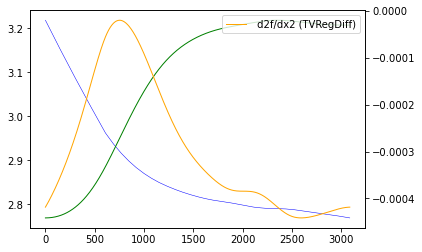

In [29]:
fig, ax1 = plt.subplots()

ax1.plot(X, Y, label='f(x)', c='blue', lw=0.5)
# plt.plot(X, np.gradient(Y, dX)*10,
#          label='df/dx (numpy)', c=(0, 0.3, 0.8), lw=1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax2.plot(X, dYdX, label='df/dx (TVRegDiff)',
         c='green', lw=1)
ax3.plot(X, d_dYdX, label=' d2f/dx2 (TVRegDiff)',
         c='orange', lw=1)
#ax3.plot(X, np.gradient(dYdX), c='red')
ax3.axis('off')
plt.legend()
plt.show()

In [30]:
def _compute_gmin(df, slope):                
    SEP = ','
    TIME_COL = 'date_time'
    SAMPLE_ID = 'sample_ID'
    YVAR = 'weight_g'
    T = 'T_C'
    RH = 'RH'
    PATM = 'Patm'
    AREA = 'Area_m2'
    k= (slope/18.01528)*(1000/60) #ici c'est en minutes (60*60*24)

    #Calcul VPD en kpa (Patm = 101.325 kPa)
    VPD =0.1*((6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))) - ((df[RH].values)/100*(6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))))) 

    #calcul gmin mmol.s
    gmin_ = -k * (df[PATM].values)/VPD

    #calcul gmin en mmol.m-2.s-1
    gmin = gmin_ / (df[AREA].values)

    #print('gmin : ', gmin)
    try:
        print('gmin mean last 100 values: ', np.mean(gmin[-100:]))
    except:
        print('gmin mean last 10 values: ', np.mean(gmin[-10:]))
    try:
        print('slope mean last 100 values: ', np.mean(slope[-100:]))
    except:
        print('slope mean last 10 values: ', np.mean(slope[-10:]))
   # return gmin, k, VPD


value from RMSE method
- slope : -2.8345999623883808e-05
- gmin : 0.05631972086872054

In [31]:
_compute_gmin(df = df, slope = dYdX)

gmin mean last 100 values:  0.05792338895939125
slope mean last 100 values:  -2.9506281405024247e-05


In [32]:
print('\n-------------------  without smoother')
dX = X[1] - X[0]

dYdX = TVRegDiff(data=Y ,itern=15000, 
                 alph=10, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 u0=np.append([0],np.diff(Y)),
                 cgtol = 1e-5)
d_dYdX = TVRegDiff(data=dYdX ,itern=50, 
                 alph=10, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 cgtol = 1e-4)


-------------------  without smoother


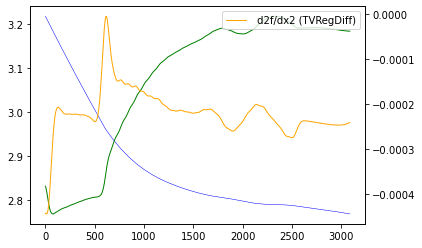

In [33]:
fig, ax1 = plt.subplots()

ax1.plot(X, Y, label='f(x)', c='blue', lw=0.5)
# plt.plot(X, np.gradient(Y, dX)*10,
#          label='df/dx (numpy)', c=(0, 0.3, 0.8), lw=1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax2.plot(X, dYdX, label='df/dx (TVRegDiff)',
         c='green', lw=1)
ax3.plot(X, d_dYdX, label=' d2f/dx2 (TVRegDiff)',
         c='orange', lw=1)
#ax3.plot(X, np.gradient(dYdX), c='red')
ax3.axis('off')
plt.legend()
plt.show()

In [34]:
def _compute_gmin(df, slope):                
    SEP = ','
    TIME_COL = 'date_time'
    SAMPLE_ID = 'sample_ID'
    YVAR = 'weight_g'
    T = 'T_C'
    RH = 'RH'
    PATM = 'Patm'
    AREA = 'Area_m2'
    k= (slope/18.01528)*(1000/60) #ici c'est en minutes (60*60*24)

    #Calcul VPD en kpa (Patm = 101.325 kPa)
    VPD =0.1*((6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))) - ((df[RH].values)/100*(6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))))) 

    #calcul gmin mmol.s
    gmin_ = -k * (df[PATM].values)/VPD

    #calcul gmin en mmol.m-2.s-1
    gmin = gmin_ / (df[AREA].values)

    #print('gmin : ', gmin)
    try:
        print('gmin mean last 100 values: ', np.mean(gmin[-100:]))
    except:
        print('gmin mean last 10 values: ', np.mean(gmin[-10:]))
    try:
        print('slope mean last 100 values: ', np.mean(slope[-100:]))
    except:
        print('slope mean last 10 values: ', np.mean(slope[-10:]))
   # return gmin, k, VPD


value from RMSE method
- slope : -2.8345999623883808e-05
- gmin : 0.05631972086872054

In [35]:
_compute_gmin(df = df, slope = dYdX)

gmin mean last 100 values:  0.06637339020462352
slope mean last 100 values:  -3.3807629259894696e-05


# Without smoothing

In [36]:
df = pd.read_csv('C:\\Users\\xavier\\Documents\\DetectEvent\\DetectEvent\\data\\auto_gmin_testdataset (copy) - Copie.csv', skiprows=1, sep=";")

In [37]:
df.head()

,campaign,sample_ID,date_time,weight_g,T_C,RH,Area_m2,Patm
0,branch_vs_leaf_4,B17_LITU_BL_11,20/10/2020 11:28,3.309324,26.0050,62.6275,0.0351,101.325
1,branch_vs_leaf_4,B17_LITU_BL_11,20/10/2020 11:32,3.362415,26.0050,62.6275,0.0351,101.325
2,branch_vs_leaf_4,B17_LITU_BL_11,20/10/2020 11:36,3.256233,26.0325,62.8575,0.0351,101.325
3,branch_vs_leaf_4,B17_LITU_BL_11,20/10/2020 11:40,3.238536,26.0025,62.7650,0.0351,101.325
4,branch_vs_leaf_4,B17_LITU_BL_11,20/10/2020 11:44,3.256233,25.9375,62.9200,0.0351,101.325


In [38]:
df['TIME_COL2'] =  pd.to_datetime( df['date_time'] , infer_datetime_format=True).values
df['delta_time']= (df['TIME_COL2']-df['TIME_COL2'][0])
X=df['delta_time'].dt.total_seconds() / 60
Y = df['weight_g'].values

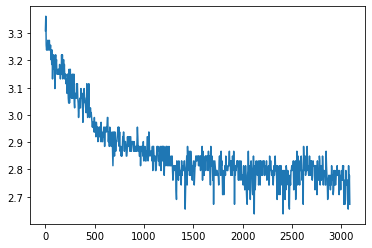

In [39]:
plt.plot(X,Y)
plt.show()

In [40]:
print('\n-------------------  without smoother')
dX = X[1] - X[0]

dYdX = TVRegDiff(data=Y ,itern=7000, 
                 alph=1000, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 u0=np.append([0],np.diff(Y)),
                 cgtol = 1e-4)
d_dYdX = TVRegDiff(data=dYdX ,itern=50, 
                 alph=10, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 cgtol = 1e-4)


-------------------  without smoother


In [41]:
def _compute_gmin(df, slope):                
    SEP = ','
    TIME_COL = 'date_time'
    SAMPLE_ID = 'sample_ID'
    YVAR = 'weight_g'
    T = 'T_C'
    RH = 'RH'
    PATM = 'Patm'
    AREA = 'Area_m2'
    k= (slope/18.01528)*(1000/60) #ici c'est en minutes (60*60*24)

    #Calcul VPD en kpa (Patm = 101.325 kPa)
    VPD =0.1*((6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))) - ((df[RH].values)/100*(6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))))) 

    #calcul gmin mmol.s
    gmin_ = -k * (df[PATM].values)/VPD

    #calcul gmin en mmol.m-2.s-1
    gmin = gmin_ / (df[AREA].values)

    #print('gmin : ', gmin)
    try:
        print('gmin mean last 100 values: ', np.mean(gmin[-100:]))
    except:
        print('gmin mean last 10 values: ', np.mean(gmin[-10:]))
    try:
        print('slope mean last 100 values: ', np.mean(slope[-100:]))
    except:
        print('slope mean last 10 values: ', np.mean(slope[-10:]))
   # return gmin, k, VPD

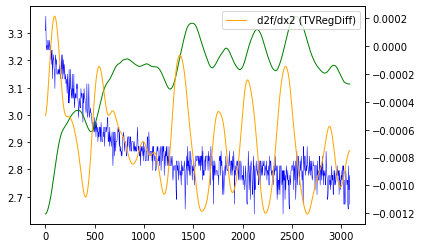

In [42]:
fig, ax1 = plt.subplots()

ax1.plot(X, Y, label='f(x)', c='blue', lw=0.5)
# plt.plot(X, np.gradient(Y, dX)*10,
#          label='df/dx (numpy)', c=(0, 0.3, 0.8), lw=1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax2.plot(X, dYdX, label='df/dx (TVRegDiff)',
         c='green', lw=1)
ax3.plot(X, d_dYdX, label=' d2f/dx2 (TVRegDiff)',
         c='orange', lw=1)
#ax3.plot(X, np.gradient(dYdX), c='red')
ax3.axis('off')
plt.legend()
plt.show()

In [43]:
def _compute_gmin(df, slope):                
    SEP = ','
    TIME_COL = 'date_time'
    SAMPLE_ID = 'sample_ID'
    YVAR = 'weight_g'
    T = 'T_C'
    RH = 'RH'
    PATM = 'Patm'
    AREA = 'Area_m2'
    k= (slope/18.01528)*(1000/60) #ici c'est en minutes (60*60*24)

    #Calcul VPD en kpa (Patm = 101.325 kPa)
    VPD =0.1*((6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))) - ((df[RH].values)/100*(6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))))) 

    #calcul gmin mmol.s
    gmin_ = -k * (df[PATM].values)/VPD

    #calcul gmin en mmol.m-2.s-1
    gmin = gmin_ / (df[AREA].values)

    #print('gmin : ', gmin)
    try:
        print('gmin mean last 100 values: ', np.mean(gmin[-100:]))
    except:
        print('gmin mean last 10 values: ', np.mean(gmin[-10:]))
    try:
        print('slope mean last 100 values: ', np.mean(slope[-100:]))
    except:
        print('slope mean last 10 values: ', np.mean(slope[-10:]))
   # return gmin, k, VPD


value from RMSE method
- slope : -2.8345999623883808e-05
- gmin : 0.05631972086872054

In [44]:
_compute_gmin(df = df, slope = dYdX)

gmin mean last 100 values:  0.3461556204131039
slope mean last 100 values:  -0.00017621915371570702


In [45]:
print('\n-------------------  without smoother')
dX = X[1] - X[0]

dYdX = TVRegDiff(data=Y ,itern=7000, 
                 alph=100000, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 u0=np.append([0],np.diff(Y)),
                 cgtol = 1e-4)
d_dYdX = TVRegDiff(data=dYdX ,itern=50, 
                 alph=10, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 cgtol = 1e-4)


-------------------  without smoother


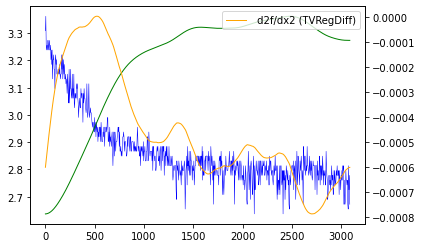

In [46]:
fig, ax1 = plt.subplots()

ax1.plot(X, Y, label='f(x)', c='blue', lw=0.5)
# plt.plot(X, np.gradient(Y, dX)*10,
#          label='df/dx (numpy)', c=(0, 0.3, 0.8), lw=1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax2.plot(X, dYdX, label='df/dx (TVRegDiff)',
         c='green', lw=1)
ax3.plot(X, d_dYdX, label=' d2f/dx2 (TVRegDiff)',
         c='orange', lw=1)
#ax3.plot(X, np.gradient(dYdX), c='red')
ax3.axis('off')
plt.legend()
plt.show()

In [47]:
def _compute_gmin(df, slope):                
    SEP = ','
    TIME_COL = 'date_time'
    SAMPLE_ID = 'sample_ID'
    YVAR = 'weight_g'
    T = 'T_C'
    RH = 'RH'
    PATM = 'Patm'
    AREA = 'Area_m2'
    k= (slope/18.01528)*(1000/60) #ici c'est en minutes (60*60*24)

    #Calcul VPD en kpa (Patm = 101.325 kPa)
    VPD =0.1*((6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))) - ((df[RH].values)/100*(6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))))) 

    #calcul gmin mmol.s
    gmin_ = -k * (df[PATM].values)/VPD

    #calcul gmin en mmol.m-2.s-1
    gmin = gmin_ / (df[AREA].values)

    #print('gmin : ', gmin)
    try:
        print('gmin mean last 100 values: ', np.mean(gmin[-100:]))
    except:
        print('gmin mean last 10 values: ', np.mean(gmin[-10:]))
    try:
        print('slope mean last 100 values: ', np.mean(slope[-100:]))
    except:
        print('slope mean last 10 values: ', np.mean(slope[-10:]))
   # return gmin, k, VPD


value from RMSE method
- slope : -2.8345999623883808e-05
- gmin : 0.05631972086872054

In [48]:
_compute_gmin(df = df, slope = dYdX)

gmin mean last 100 values:  0.1421649948483854
slope mean last 100 values:  -7.240129200224133e-05


In [49]:
print('\n-------------------  without smoother')
dX = X[1] - X[0]

dYdX = TVRegDiff(data=Y ,itern=150000, 
                 alph=10000, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 u0=np.append([0],np.diff(Y)),
                 cgtol = 1e-5)
d_dYdX = TVRegDiff(data=dYdX ,itern=50, 
                 alph=10, dx=dX, 
                 ep=1e-6,
                 scale='large' ,
                 plotflag=False, 
                 precondflag=True,
                 diffkernel='abs',
                 cgtol = 1e-4)


-------------------  without smoother


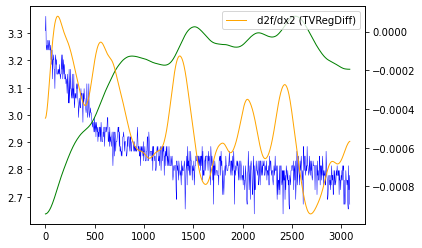

In [50]:
fig, ax1 = plt.subplots()

ax1.plot(X, Y, label='f(x)', c='blue', lw=0.5)
# plt.plot(X, np.gradient(Y, dX)*10,
#          label='df/dx (numpy)', c=(0, 0.3, 0.8), lw=1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax2.plot(X, dYdX, label='df/dx (TVRegDiff)',
         c='green', lw=1)
ax3.plot(X, d_dYdX, label=' d2f/dx2 (TVRegDiff)',
         c='orange', lw=1)
#ax3.plot(X, np.gradient(dYdX), c='red')
ax3.axis('off')
plt.legend()
plt.show()

In [51]:
def _compute_gmin(df, slope):                
    SEP = ','
    TIME_COL = 'date_time'
    SAMPLE_ID = 'sample_ID'
    YVAR = 'weight_g'
    T = 'T_C'
    RH = 'RH'
    PATM = 'Patm'
    AREA = 'Area_m2'
    k= (slope/18.01528)*(1000/60) #ici c'est en minutes (60*60*24)

    #Calcul VPD en kpa (Patm = 101.325 kPa)
    VPD =0.1*((6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))) - ((df[RH].values)/100*(6.13753*np.exp((17.966*(df[T].values)/((df[T].values)+247.15)))))) 

    #calcul gmin mmol.s
    gmin_ = -k * (df[PATM].values)/VPD

    #calcul gmin en mmol.m-2.s-1
    gmin = gmin_ / (df[AREA].values)

    #print('gmin : ', gmin)
    try:
        print('gmin mean last 100 values: ', np.mean(gmin[-100:]))
    except:
        print('gmin mean last 10 values: ', np.mean(gmin[-10:]))
    try:
        print('slope mean last 100 values: ', np.mean(slope[-100:]))
    except:
        print('slope mean last 10 values: ', np.mean(slope[-10:]))
   # return gmin, k, VPD


value from RMSE method
- slope : -2.8345999623883808e-05
- gmin : 0.05631972086872054

In [52]:
_compute_gmin(df = df, slope = dYdX)

gmin mean last 100 values:  0.27000947719459867
slope mean last 100 values:  -0.00013748651797263113
